<a href="https://colab.research.google.com/github/Bmartins25/Mineracao_de_dados_and_LLM_UFMG/blob/main/TP2_fase_1_Clusterizacao_Minera%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP2 FASE 1 - Foco em Clusterização**

Alunos: **Bruno Bartolomeu e Carlos Large - Mineração de dados UFMG**

Nome do Dataset: **Olimpíadas 2024 vs PIB**

Origem do Dataset: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

Características do Dataset: **10 Colunas | 7 Colunas numéricas e 3 Colunas texto**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from itertools import combinations
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from sklearn.cluster import KMeans, DBSCAN
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation


In [57]:
# Load the dataset
data_path = 'Olympics_games_2024.csv'  # Update path as needed
data = pd.read_csv(data_path, delimiter=';')



In [58]:
# Selecting numerical features for clustering
features = data[['gold', 'silver', 'bronze', 'total', 'gdp', 'population']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [59]:
# Applying clustering methods
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)




In [60]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(scaled_features)


In [61]:

# Mean Shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(scaled_features)


In [62]:
# Visualizing clustering results
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

In [63]:
# Add labels to original data
olympics_data['KMeans_Cluster'] = kmeans_labels
olympics_data['DBSCAN_Cluster'] = dbscan_labels
olympics_data['MeanShift_Cluster'] = mean_shift_labels



Text(0, 0.5, 'Feature 2')

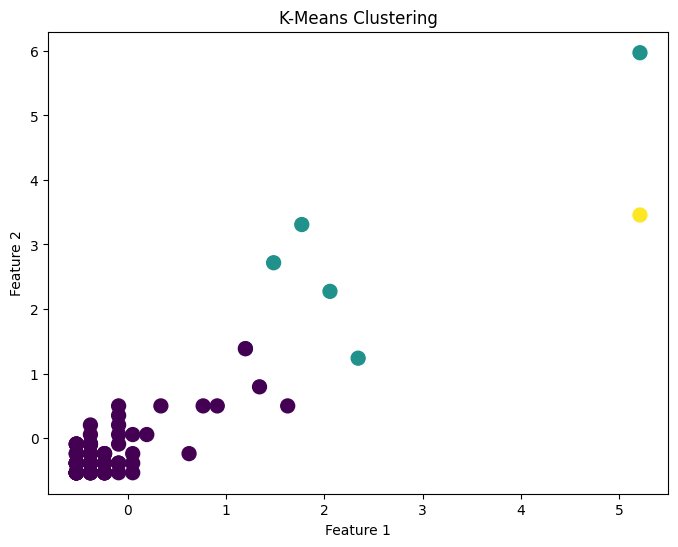

In [73]:
# K-Means visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

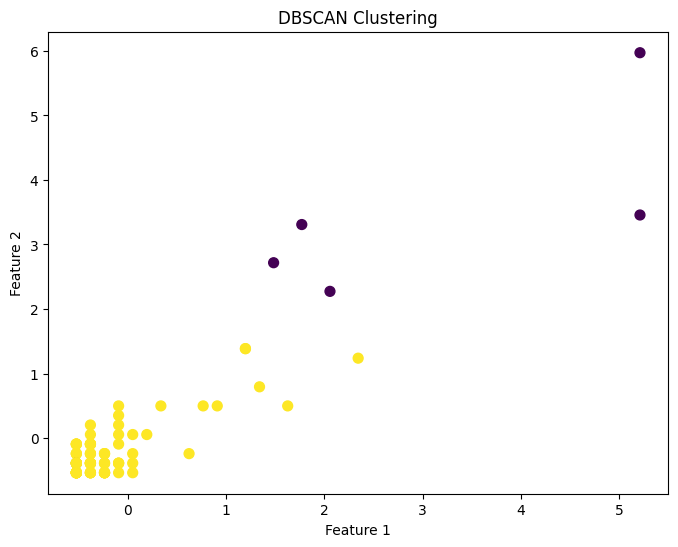

In [74]:
# DBSCAN visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')



Text(0, 0.5, 'Feature 2')

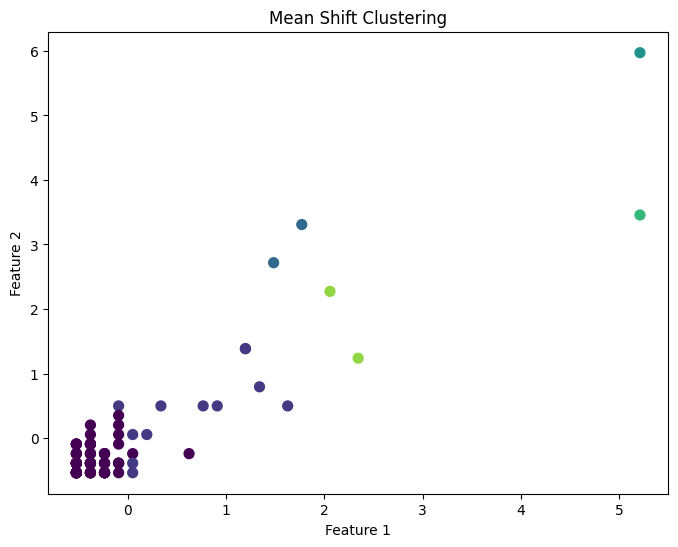

In [75]:
# Mean Shift visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=mean_shift_labels, cmap='viridis', s=50)
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


In [68]:

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [69]:
# Calculate evaluation metrics
evaluation = {
    "K-Means": silhouette_score(scaled_features, kmeans_labels) if len(set(kmeans_labels)) > 1 else None,
    "DBSCAN": silhouette_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else None,
    "Mean Shift": silhouette_score(scaled_features, mean_shift_labels) if len(set(mean_shift_labels)) > 1 else None
}


In [70]:
# Print evaluation metrics
print("Evaluation Metrics:")
for method, score in evaluation.items():
    print(f"{method}: Silhouette Score = {score}")


Evaluation Metrics:
K-Means: Silhouette Score = 0.6869408986684424
DBSCAN: Silhouette Score = 0.7369717603388998
Mean Shift: Silhouette Score = 0.48000389624557854






Os agrupamentos foram concluídos e resumos estatísticos de cada cluster foram gerados para os métodos K-Means, DBSCAN e Mean Shift. **negrito**

Os resultados estão disponíveis para análise e mostram como os países foram agrupados com base em características como medalhas, PIB e população.

* Observações iniciais:

  * K-Means: Criou 3 grupos distintos com base em tendências gerais, como países com maior número de medalhas e PIB.
Cluster 0 inclui países como EUA e China (altos valores de medalhas e PIB).


  * DBSCAN: Identificou 1 cluster significativo, excluindo o ruído.
Agrupou países com menor densidade de conquistas e características econômicas.


  * Mean Shift:

Formou 7 clusters, identificando subgrupos mais detalhados.
Evidenciou outliers e separações adicionais, como países com PIB extremamente baixo.